In [5]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [7]:
df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [8]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


<Axes: ylabel='Frequency'>

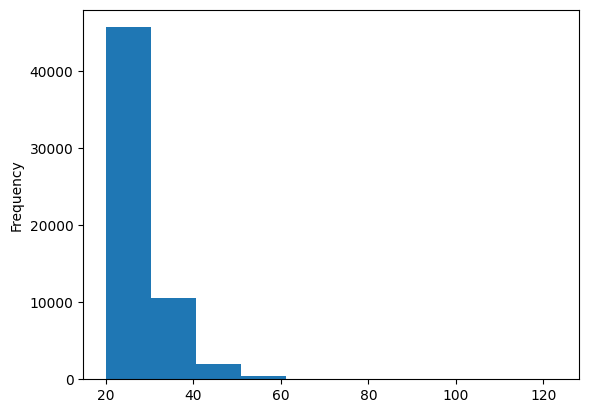

In [9]:
df['person_age'].plot(kind='hist')

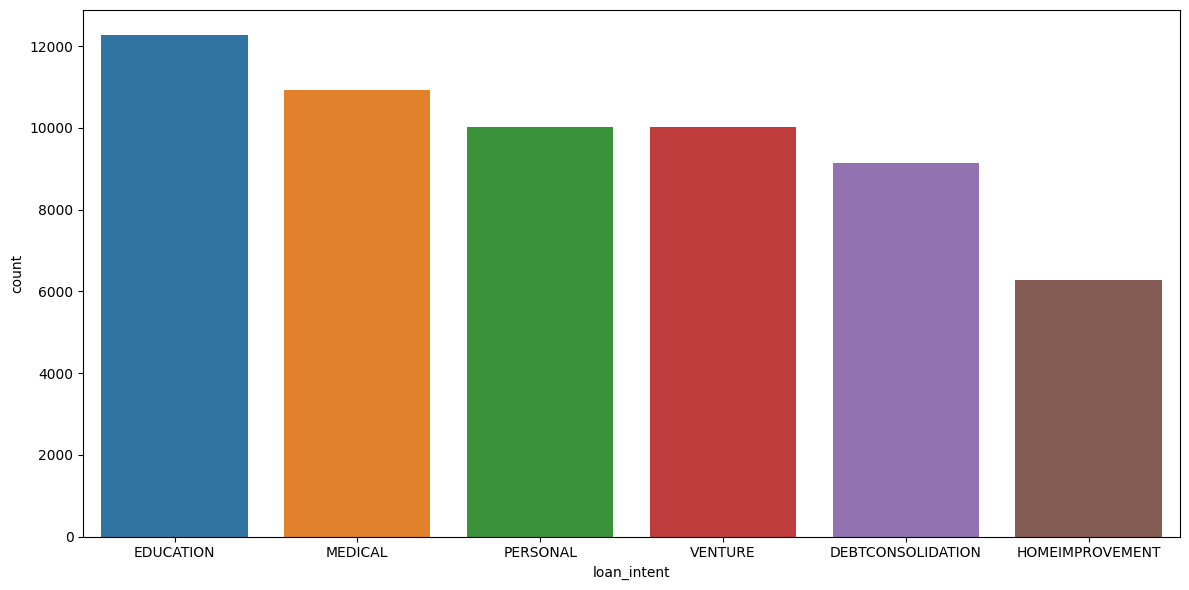

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='loan_intent')
plt.tight_layout()

<Axes: xlabel='person_home_ownership'>

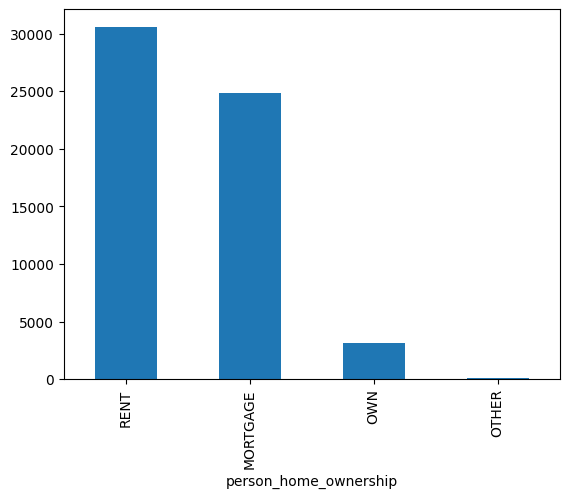

In [11]:
df['person_home_ownership'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_grade'>

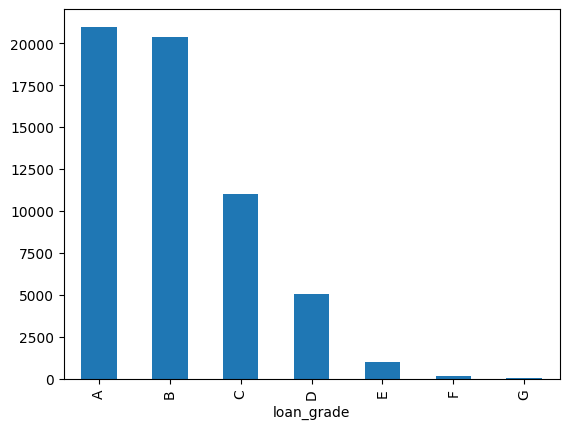

In [12]:
df['loan_grade'].value_counts().plot(kind='bar')

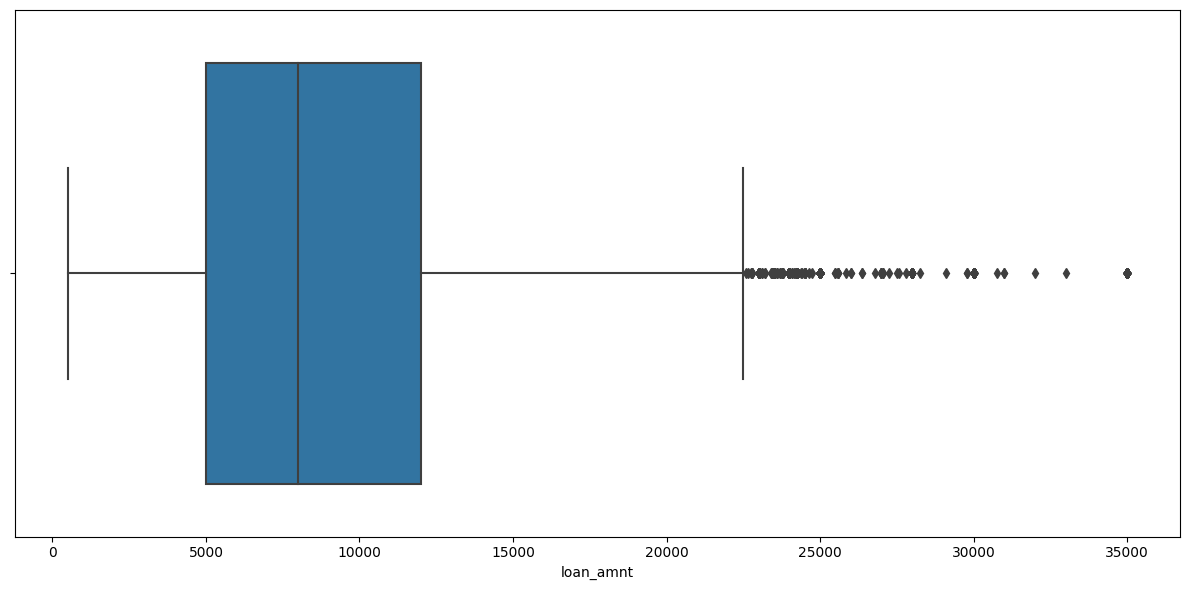

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='loan_amnt',hue='person_home_ownership')
plt.tight_layout()


<Axes: xlabel='cb_person_default_on_file'>

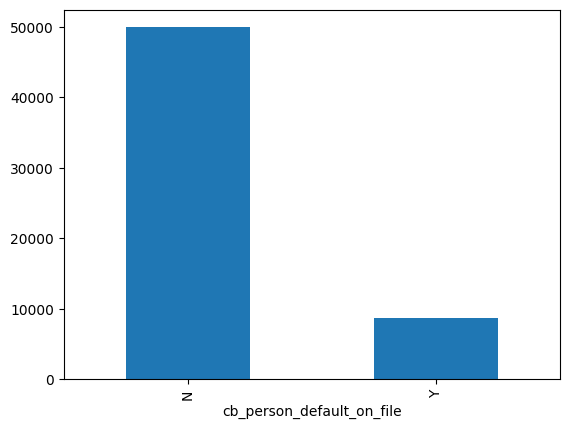

In [14]:
df['cb_person_default_on_file'].value_counts().plot(kind='bar')

<Axes: xlabel='loan_int_rate', ylabel='loan_amnt'>

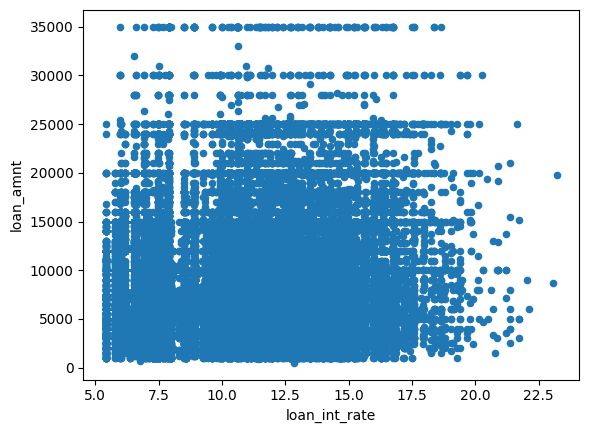

In [15]:
df.plot.scatter(x='loan_int_rate',y='loan_amnt')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [17]:
cat_columns = df.select_dtypes(include=['object']).columns
num_columns = df.select_dtypes(include=['int64','float64']).columns

In [18]:
cat_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [19]:
num_columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_status'],
      dtype='object')

In [20]:
df[num_columns].drop(columns = 'id').corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


<Axes: >

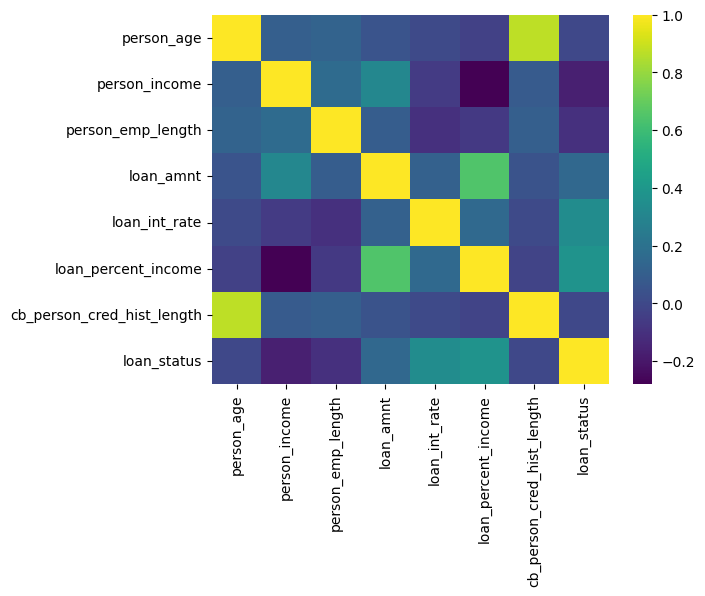

In [21]:
sns.heatmap(df[num_columns].drop(columns = 'id').corr(),cmap='viridis')

<Axes: xlabel='person_age', ylabel='cb_person_cred_hist_length'>

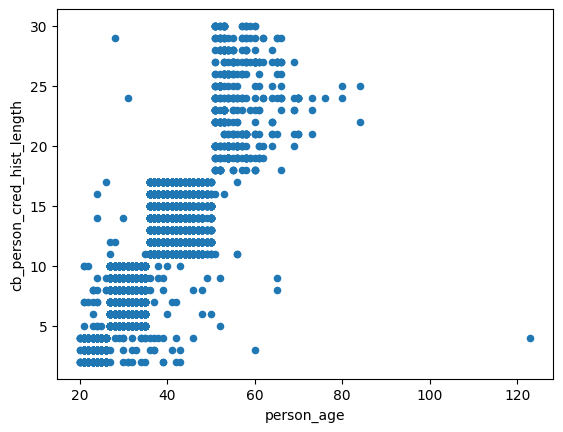

In [22]:
df.plot.scatter(y='cb_person_cred_hist_length',x='person_age')

In [23]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier,LogisticRegressionCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [25]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [26]:
cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(include=['int64','float64']).columns

In [27]:
num_columns = num_columns.drop('id')

In [28]:
num_columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [29]:
cat_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [30]:
onehot = OneHotEncoder()
num_transformer = StandardScaler()

In [31]:
transformer = ColumnTransformer(
    [
        ('num',num_transformer,num_columns),
        ('cat',onehot,cat_columns)
    ]
)

In [ ]:
# X_ready = pipe.fit_transform(X)

In [ ]:
# X_ready[0]

In [58]:
from imblearn.over_sampling import SMOTE


In [59]:
smote = SMOTE()

In [138]:
pipeline = Pipeline(steps=[
    ('transform',transformer),
    # ('smote',smote),
    ('model',LogisticRegression(penalty='l2',max_iter=1000,C=10,
                                class_weight={0: 1, 1: 3}
))
])

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [140]:
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [141]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(C=10, class_weight={0: 1, 1: 3},
                                    max_iter=1000))])

In [142]:
pred = pipeline.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [144]:
f1_score(y_test,pred)

0.6630666012109312

In [145]:
confusion_matrix(y_test,pred)

array([[15268,  1360],
       [  699,  2026]])

In [146]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16628
           1       0.60      0.74      0.66      2725

    accuracy                           0.89     19353
   macro avg       0.78      0.83      0.80     19353
weighted avg       0.91      0.89      0.90     19353



In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [177]:
param_grid={
    'model__C':[0.01,0.1,1,10],
    # 'model__penalty' : ['l1','l2'],
    'model__class_weight': [None, 'balanced',{0: 1, 1: 5}]
}

In [178]:
random_search = RandomizedSearchCV(
    estimator=pipeline,param_distributions=param_grid, n_iter=50, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)

In [ ]:
random_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
random_search.best_params_